In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

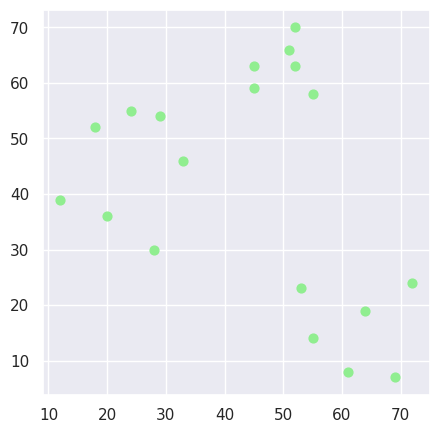

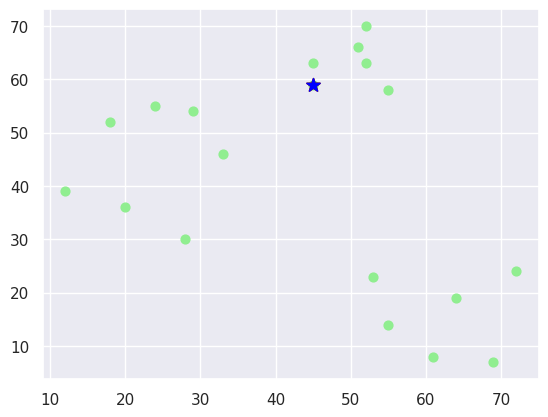

In [10]:
data = {
    'x':[12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y':[39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
}

df = pd.DataFrame(data, columns=['x', 'y'])
# print(df)

k = 3
plt.figure(figsize=(5,5))

# def plot_points(points):
#     plt.scatter(*points, c="lightgreen", s=40)
#     plt.show()
    
# plot_points([data['x'], data['y']])
plt.scatter(data['x'], data['y'], c="lightgreen", s=40)
plt.show()



color_map = ['green', 'red', 'blue']

def get_random():
    idx = np.random.randint(0, len(data['x']))
    return data['x'][idx], data['y'][idx]

centroids = []

# Initial centroids 
for i in range(k):
    ans = get_random()
    centroids.append(ans)
    
# def plot_centroids(centroids):
#     for i in range(len(centroids)):
#         plt.scatter(*centroids[i], c=color_map[i], s=100, marker='*') 
#     plt.show()
# print(centroids)



    

def plot_both(points, centroids):
    plt.scatter(*points, c="lightgreen", s=40)
    for i in range(len(centroids)):
        plt.scatter(*centroids[i], c=color_map[i], s=100, marker='*') 
    plt.show()
    
plot_both([data['x'], data['y']], centroids)
    


     x   y
0   12  39
1   20  36
2   28  30
3   18  52
4   29  54
5   33  46
6   24  55
7   45  59
8   45  63
9   52  70
10  51  66
11  52  63
12  55  58
13  53  23
14  55  14
15  61   8
16  64  19
17  69   7
18  72  24


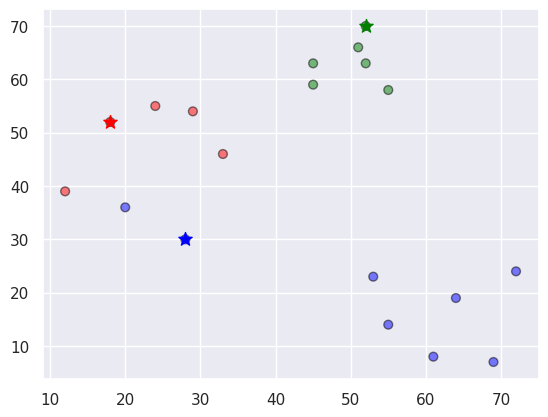

,x,y,distance_from_0,distance_from_1,distance_from_2,closest,color
0,12,39,50.606324,14.317821,18.357560,1,red
1,20,36,46.690470,16.124515,10.000000,2,blue
2,28,30,46.647615,24.166092,0.000000,2,blue
3,18,52,38.470768,0.000000,24.166092,1,red
4,29,54,28.017851,11.180340,24.020824,1,red


In [3]:
# Assignment stage

def assignment(df, centroids):
    # print(df)
    for i in range(len(centroids)):
        df['distance_from_{}'.format(i)] = (
            np.sqrt((df['x'] - centroids[i][0])**2 + (df['y'] - centroids[i][1])**2)
        )
    # print(df)
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in range(len(centroids))]
    # ['distance_from_0', 'distance_from_1', 'distance_from_2']
    closest = df.loc[:, ['distance_from_0', 'distance_from_1', 'distance_from_2']].idxmin(axis=1)
    # print(closest)
    df['closest'] = closest.str[-1]
    # print(df)
    df['color'] = df['closest'].map(lambda x: color_map[int(x)])
        
assignment(df, centroids)

plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='black', s=40)
for i in range(len(centroids)):
    plt.scatter(*centroids[i], c=color_map[i], s=100, marker='*') 
plt.show()

df.head()

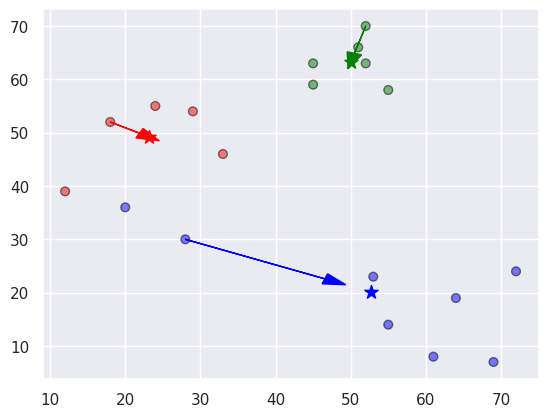

In [4]:
import copy

old_centroids = copy.deepcopy(centroids)
def update(k):
    for i in range(k):
        x = np.mean(df[df['closest'] == str(i)]['x'])
        y = np.mean(df[df['closest'] == str(i)]['y'])
        centroids[i] = (x, y)
        
update(k)

plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='black', s=40)
for i in range(len(centroids)):
    plt.scatter(*centroids[i], c=color_map[i], s=100, marker='*')

# plotting arrow
for i in range(len(centroids)):
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    plt.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=color_map[i], ec=color_map[i])
    
     
plt.show()



        



     x   y  distance_from_0  distance_from_1  distance_from_2 closest  color
0   12  39        50.606324        14.317821        18.357560       1    red
1   20  36        46.690470        16.124515        10.000000       2   blue
2   28  30        46.647615        24.166092         0.000000       2   blue
3   18  52        38.470768         0.000000        24.166092       1    red
4   29  54        28.017851        11.180340        24.020824       1    red
5   33  46        30.610456        16.155494        16.763055       1    red
6   24  55        31.764760         6.708204        25.317978       1    red
7   45  59        13.038405        27.892651        33.615473       0  green
8   45  63         9.899495        29.154759        37.121422       0  green
9   52  70         0.000000        38.470768        46.647615       0  green
10  51  66         4.123106        35.846897        42.720019       0  green
11  52  63         7.000000        35.735137        40.804412       0  green

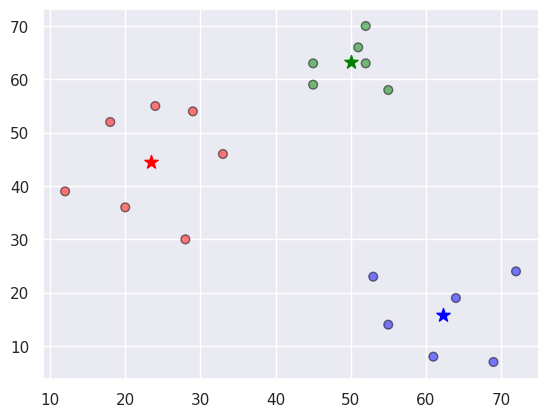

In [5]:
iteration = 0
while True:
    closest_centroids = df['closest'].copy(deep=True)
    update(k)
    assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
    iteration += 1

plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='black', s=40)
for i in range(len(centroids)):
    plt.scatter(*centroids[i], c=color_map[i], s=100, marker='*')
    
print("Number of iterations: ", iteration)

In [6]:
print(df.loc[2:5, ['x', 'y']])
print(df.iloc[2:5, 1:3])


    x   y
2  28  30
3  18  52
4  29  54
5  33  46
    y  distance_from_0
2  30        39.799846
3  52        33.892395
4  54        22.913485
